In [7]:
# New Section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
import statsmodels.api as sm
import scipy.stats as stats

(array([2.0000e+00, 3.0000e+01, 1.0700e+02, 3.3500e+02, 9.8000e+02,
        2.1180e+03, 4.4950e+03, 7.6720e+03, 1.1130e+04, 1.3954e+04,
        1.5234e+04, 1.4112e+04, 1.1553e+04, 8.2410e+03, 5.1980e+03,
        2.7210e+03, 1.2560e+03, 5.5200e+02, 2.1300e+02, 7.4000e+01,
        2.0000e+01, 3.0000e+00, 0.0000e+00]),
 array([125., 130., 135., 140., 145., 150., 155., 160., 165., 170., 175.,
        180., 185., 190., 195., 200., 205., 210., 215., 220., 225., 230.,
        235., 240.]),
 <BarContainer object of 23 artists>)

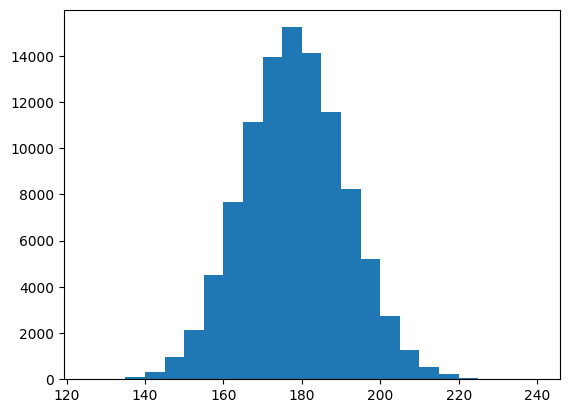

In [8]:
df = pd.read_csv('3 1-filter and 1 lakh.csv',  names=['y','x'])
df.head()
sample=df
np_X=np.array(sample['x'])
plt.hist(np_X,bins=[125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240])

In [9]:
print(df.describe())

                   y              x
count  100000.000000  100000.000000
mean       24.999750     177.651390
std        14.433829      13.078982
min         0.000000     126.000000
25%        12.499875     169.000000
50%        24.999750     178.000000
75%        37.499625     186.000000
max        49.999500     233.000000


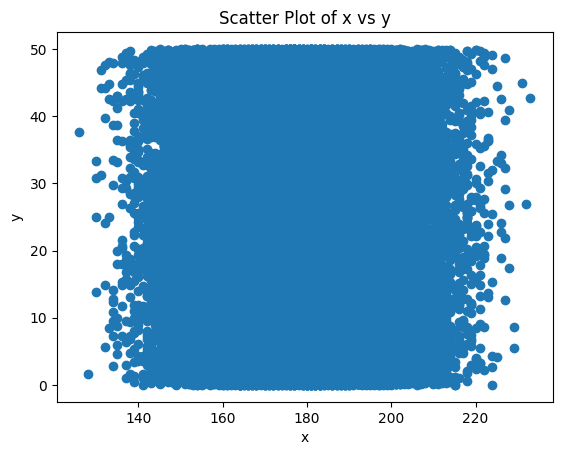

In [10]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y')
plt.show()

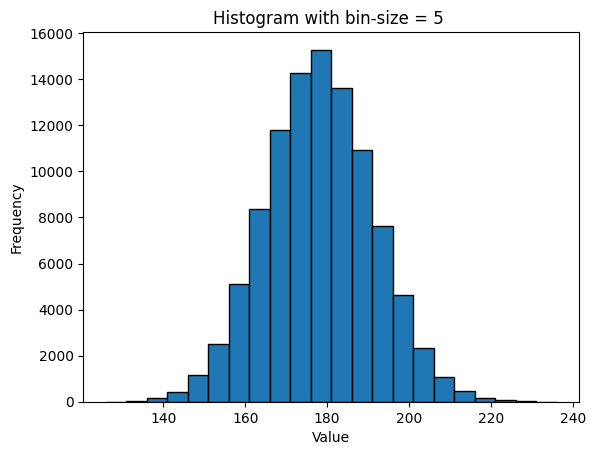

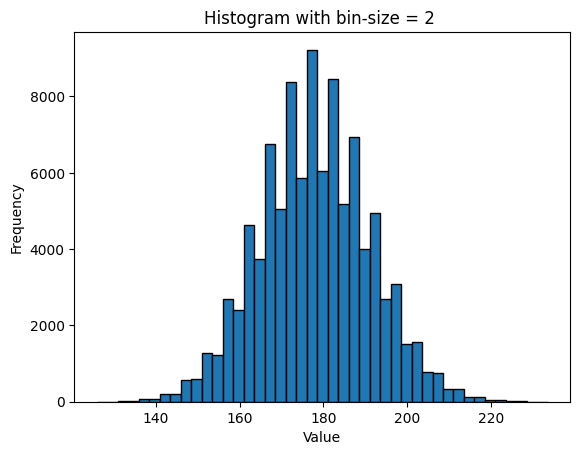

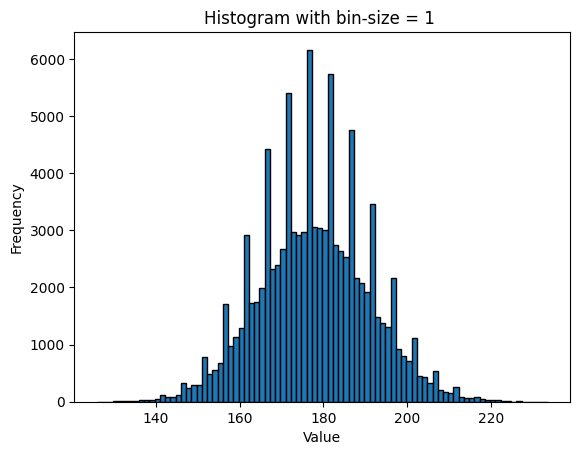

In [11]:
w=5.0
while(w>=1):
  plt.hist(np_X, edgecolor='black', bins=np.arange(min(np_X), max(np_X) + w, w))
  plt.title("Histogram with bin-size = %i " %w)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  w=w/2

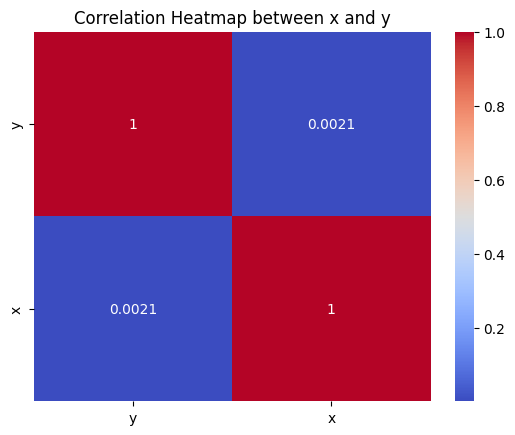

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between x and y')
plt.show()

## Normalizing the data

In [13]:
X = np.array(sample['x'])
y = np.array(sample['y'])


In [14]:
# StandardScaler().fit_transform(X.reshape(-1,1))
X = StandardScaler().fit_transform(X.reshape(-1,1))

In [15]:
X = X.reshape(-1,1)

In [16]:
X

array([[-1.88481895],
       [-0.73793497],
       [-0.35564031],
       ...,
       [-0.04980458],
       [ 0.40894901],
       [-0.8143939 ]])

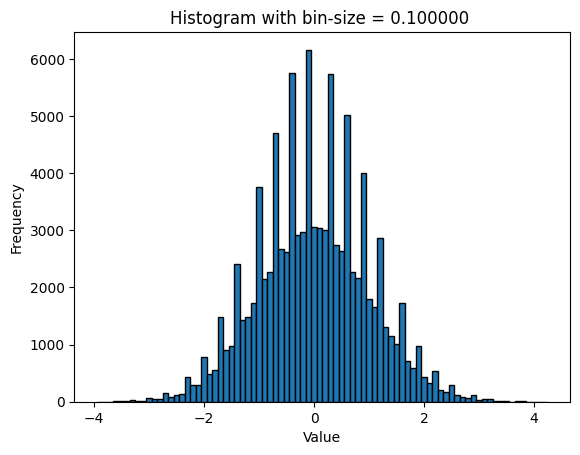

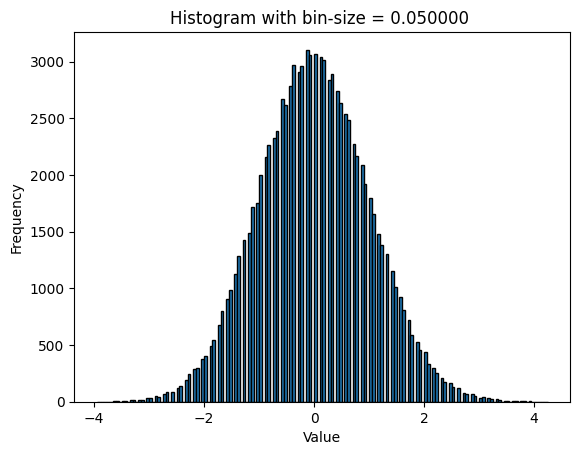

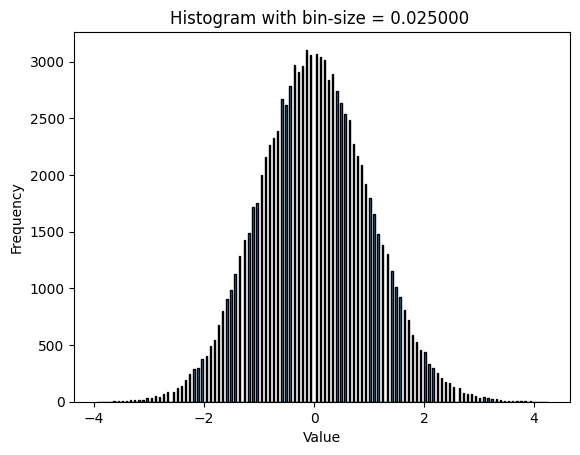

In [17]:
t=10

while(w>=0.05):
  w=float(t/100)
  plt.hist(X, edgecolor='black', bins=np.arange(min(X), max(X) + w, w))
  plt.title("Histogram with bin-size = %f " %w)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  t=t/2

In [18]:
X = MinMaxScaler().fit_transform(X.reshape(-1,1))

In [19]:
X

array([[0.25233645],
       [0.39252336],
       [0.43925234],
       ...,
       [0.47663551],
       [0.53271028],
       [0.38317757]])

<ipython-input-20-77551ddd3449>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X, shade=True)
<ipython-input-20-77551ddd3449>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, shade=True)


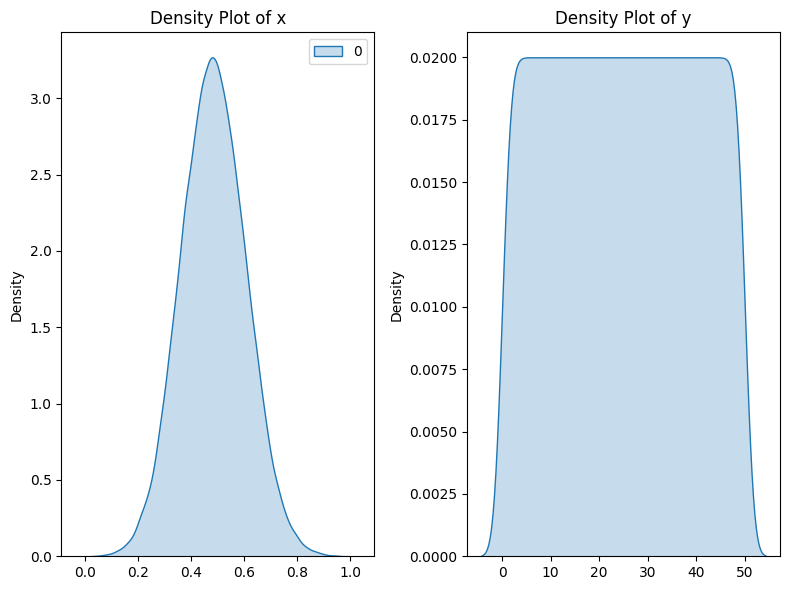

In [20]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(X, shade=True)
plt.title('Density Plot of x')

plt.subplot(1, 2, 2)
sns.kdeplot(y, shade=True)
plt.title('Density Plot of y')

plt.tight_layout()
plt.show()

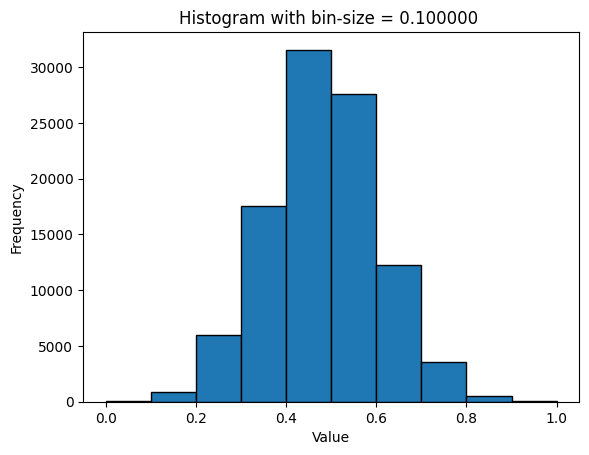

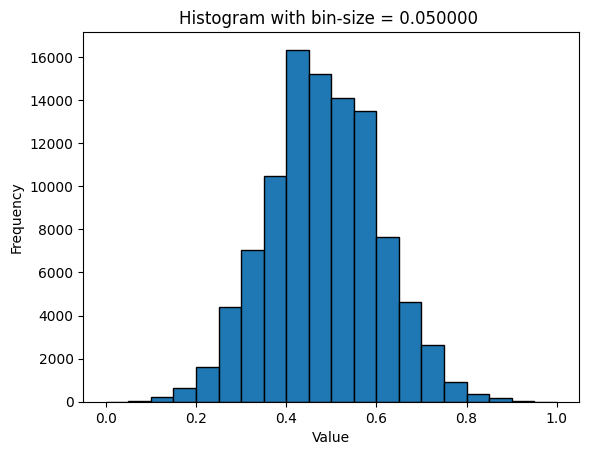

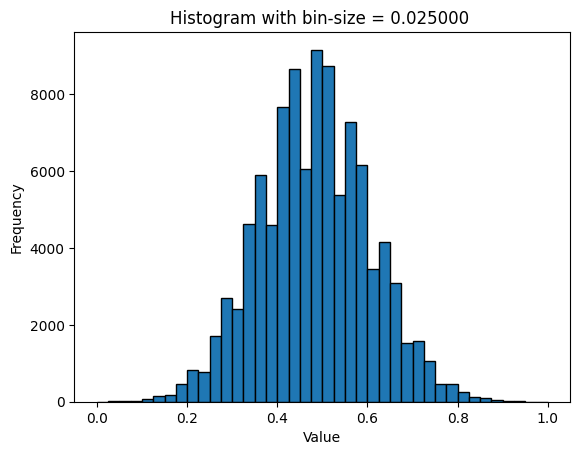

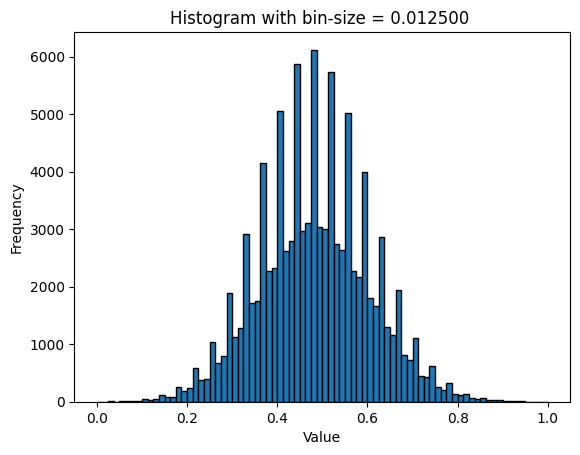

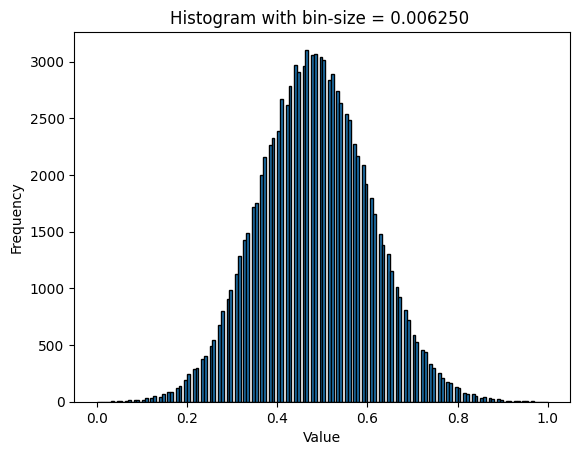

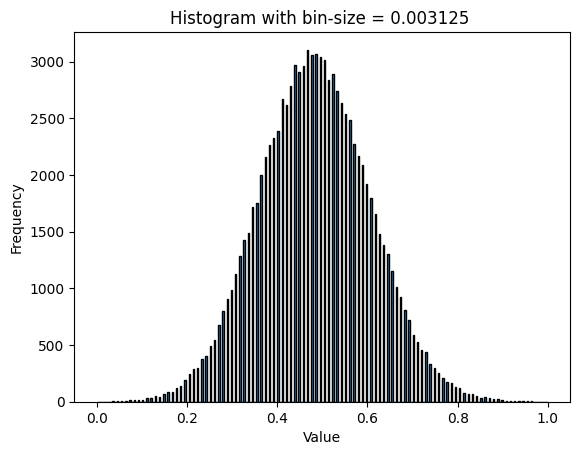

In [21]:
t=10

while(w>=0.005):
  w=float(t/100)
  plt.hist(X, edgecolor='black', bins=np.arange(min(X), max(X) + w, w))
  plt.title("Histogram with bin-size = %f " %w)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()
  t=t/2

In [22]:
data = sample['x']

In [23]:
ecdf = sm.distributions.ECDF(data)

In [24]:
x = np.linspace(min(data), max(data))
y = ecdf(x)

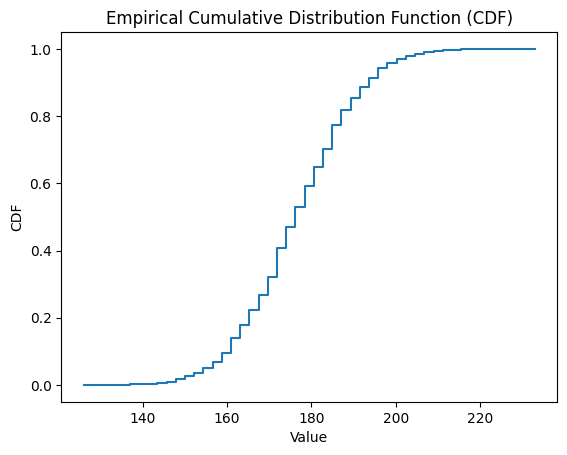

In [25]:
plt.step(x, y)
plt.title("Empirical Cumulative Distribution Function (CDF)")
plt.xlabel('Value')
plt.ylabel('CDF')
plt.show()

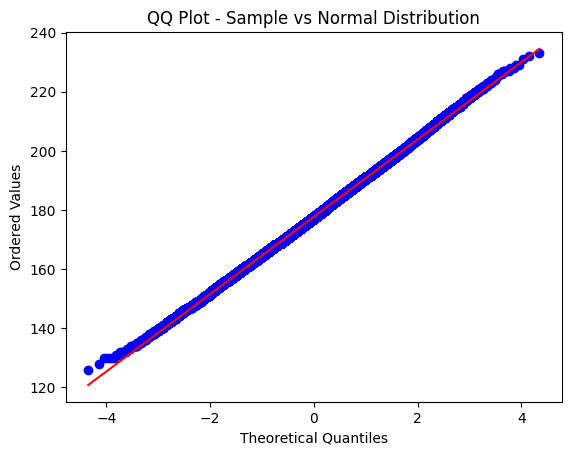

In [26]:
data = sample['x']

stats.probplot(data, dist="norm", plot=plt)
plt.title("QQ Plot - Sample vs Normal Distribution")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

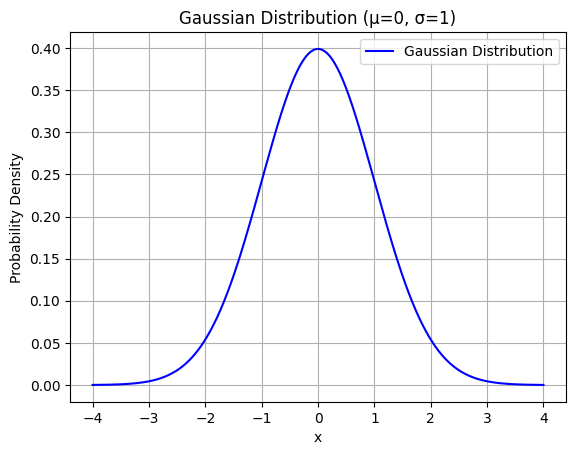

In [27]:
mu = 0
sigma = 1

x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, label='Gaussian Distribution', color='blue')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution (μ=0, σ=1)')
plt.legend()
plt.grid(True)
plt.show()